<a href="https://colab.research.google.com/github/mjalalimanesh/statistical-learning-ISLR-python/blob/master/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My [ISLR Notebooks](https://github.com/mjalalimanesh/statistical-learning-ISLR-python)

# 6.5 Lab 1 : Subset Selection Methods

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from itertools import chain, combinations
import statsmodels.api as sm

pd.set_option('precision', 2) # number precision for pandas
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', 12)

plt.style.use('seaborn') # pretty matplotlib plots

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
hitters = pd.read_csv('https://raw.githubusercontent.com/mjalalimanesh/statistical-learning-ISLR-python/master/datasets/Hitters.csv', index_col=0).dropna()
hitters.index.name = 'Player'

hitters = hitters.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,18]] # push salary at the end
hitters['League'] = pd.get_dummies(hitters['League']).iloc[:, 0]
hitters['Division'] = pd.get_dummies(hitters['Division']).iloc[:, 0]
hitters['NewLeague'] = pd.get_dummies(hitters['NewLeague']).iloc[:, 0]


X = hitters.iloc[:, 0:19]
y = hitters.iloc[:, 19]

hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,...,Division,PutOuts,Assists,Errors,NewLeague,Salary
Player,,,,,,,,,,,,,
-Alan Ashby,315,81,7,24,38,39,...,0,632,43,10,0,475.0
-Alvin Davis,479,130,18,66,72,76,...,0,880,82,14,1,480.0
-Andre Dawson,496,141,20,65,78,37,...,1,200,11,3,0,500.0
-Andres Galarraga,321,87,10,39,42,30,...,1,805,40,4,0,91.5
-Alfredo Griffin,594,169,4,74,51,35,...,0,282,421,25,1,750.0


## 6.5.1 Best Subset Selection

In [ ]:
# adapted from: 
# https://songhuiming.github.io/pages/2016/07/12/variable-selection-in-python/
# and:
# http://www.science.smith.edu/~jcrouser/SDS293/labs/
# takes a f**in' long time


sub = []
reg = []
kft = []

n_features = X.shape[1]

for k_features in range(1, 20):
    subsets = chain(combinations(range(n_features), k_features))

    best_score = np.inf

    for subset in subsets:
        lin_reg = sm.OLS(y, sm.add_constant(X.iloc[:, list(subset)])).fit()
        score = lin_reg.ssr
        if score < best_score:
            best_score, best_subset = score, list(subset)
            best_reg = lin_reg

    sub.append(best_subset)
    reg.append(best_reg)
    kft.append(k_features)

results = pd.DataFrame({'kft': kft, 'sub': sub, 'reg': reg},
                       columns = ['sub', 'reg', 'kft']).set_index('kft')

In [ ]:
results

,sub,reg
kft,,
1,[11],<statsmodels.regression.linear_model.Regressio...
2,"[1, 11]",<statsmodels.regression.linear_model.Regressio...
3,"[1, 11, 15]",<statsmodels.regression.linear_model.Regressio...
4,"[1, 11, 14, 15]",<statsmodels.regression.linear_model.Regressio...
5,"[0, 1, 11, 14, 15]",<statsmodels.regression.linear_model.Regressio...
...,...,...
15,"[0, 1, 2, 3, 5, 7, 8, 10, 11, 12, 13, 14, 15, ...",<statsmodels.regression.linear_model.Regressio...
16,"[0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 1...",<statsmodels.regression.linear_model.Regressio...
17,"[0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 1...",<statsmodels.regression.linear_model.Regressio...


In [ ]:
from operator import attrgetter

results['rss'] = results['reg'].apply(attrgetter('ssr'))
results['AIC'] = results['reg'].apply(attrgetter('aic'))
results['BIC'] = results['reg'].apply(attrgetter('bic'))
results['AdjR2'] = results['reg'].apply(attrgetter('rsquared_adj'))

results

,sub,reg,rss,AIC,BIC,AdjR2
kft,,,,,,
1,[11],<statsmodels.regression.linear_model.Regressio...,3.62e+07,3862.14,3869.28,0.32
2,"[1, 11]",<statsmodels.regression.linear_model.Regressio...,3.06e+07,3820.49,3831.20,0.42
3,"[1, 11, 15]",<statsmodels.regression.linear_model.Regressio...,2.92e+07,3810.21,3824.50,0.45
4,"[1, 11, 14, 15]",<statsmodels.regression.linear_model.Regressio...,2.80e+07,3800.46,3818.32,0.47
5,"[0, 1, 11, 14, 15]",<statsmodels.regression.linear_model.Regressio...,2.71e+07,3794.63,3816.06,0.48
...,...,...,...,...,...,...
15,"[0, 1, 2, 3, 5, 7, 8, 10, 11, 12, 13, 14, 15, ...",<statsmodels.regression.linear_model.Regressio...,2.42e+07,3784.76,3841.91,0.52
16,"[0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 1...",<statsmodels.regression.linear_model.Regressio...,2.42e+07,3786.59,3847.31,0.52
17,"[0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 1...",<statsmodels.regression.linear_model.Regressio...,2.42e+07,3788.48,3852.78,0.51


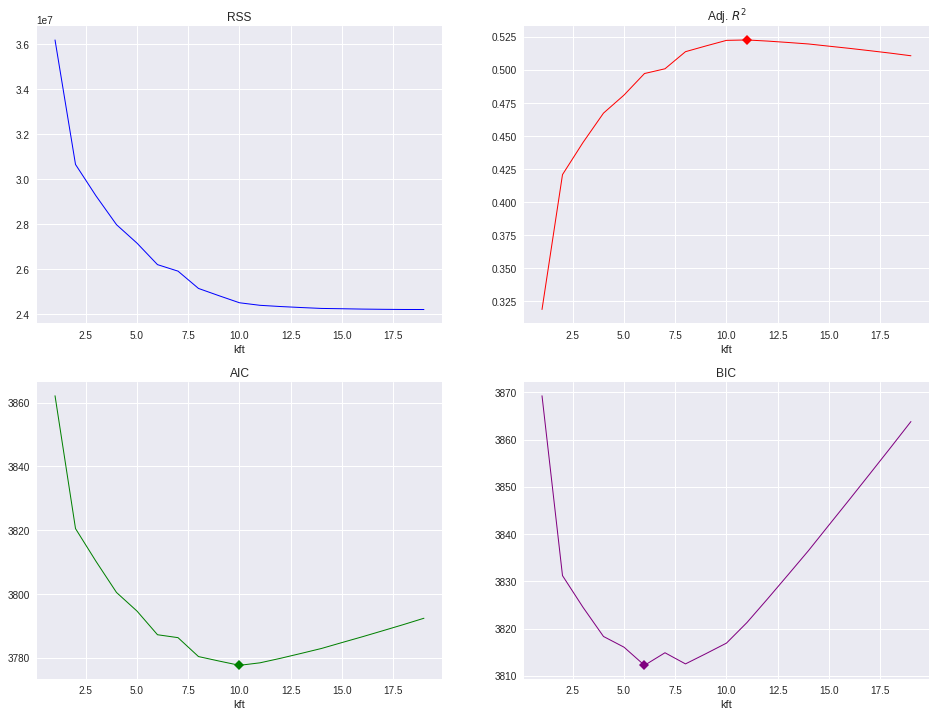

In [ ]:
plt.figure(figsize=(16,12))

plt.subplot(2, 2, 1)
results.rss.plot(title='RSS', lw=1, color='blue')

plt.subplot(2, 2, 2)
max_r2a = results.AdjR2.argmax()
results.AdjR2.plot(title='Adj. $R^2$', markevery=[max_r2a], marker='D', lw=1, color='red')

plt.subplot(2, 2, 3)
min_aic = results.AIC.argmin()
results.AIC.plot(title='AIC', markevery=[min_aic], marker='D', lw=1, color='green')

plt.subplot(2, 2, 4)
min_bic = results.BIC.argmin()
results.BIC.plot(title='BIC', markevery=[min_bic], marker='D', lw=1, color='purple');

## 6.5.2 Forward and Backward Stepwise Selection

In [5]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = regr.ssr
    return {'model': regr, 'RSS': RSS}

In [6]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
      
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    # Return the best model, along with some other useful information about the model
    return best_model

def backward(predictors):
    
    results = []
    
    for combo in combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]

    return best_model

#### Forward Selection

In [15]:
models2 = pd.DataFrame(columns=['RSS', 'model'])

predictors = []

for i in range(1,len(X.columns)+1):    
    models2.loc[i] = forward(predictors)
    predictors = models2.loc[i]['model'].model.exog_names

bic_f = []

for m in models2.model:
    bic_f.append(m.bic)
    
min_bic_ind = np.array(bic_f).argmin()
print(min_bic_ind)
models2.loc[min_bic_ind]['model'].model.exog_names

5


['Hits', 'CRBI', 'PutOuts', 'AtBat', 'Division']

#### Backward Selection

In [16]:
models3 = pd.DataFrame(columns=['RSS', 'model'], index = range(1, len(X.columns)))

predictors = X.columns

while(len(predictors) > 1):  
    models3.loc[len(predictors)-1] = backward(predictors)
    predictors = models3.loc[len(predictors)-1]['model'].model.exog_names
    
bic_b = []

for m in models3.model:
    bic_b.append(m.bic)
    
min_bic_ind = np.array(bic_b).argmin()
print(min_bic_ind)
models3.loc[min_bic_ind]['model'].model.exog_names

7


['AtBat', 'Hits', 'Walks', 'CRuns', 'CWalks', 'Division', 'PutOuts']

## 6.5.3 Choosing Among Models Using the Validation Set Approach and Cross-Validation

#### Validation Set Approach

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=3)

In [20]:
def processSubset(feature_set, X_train, y_train, X_test, y_test):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,X_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_test[list(feature_set)]) - y_test) ** 2).sum()
    return {'model':regr, 'RSS':RSS}

In [19]:
def forward(predictors, X_train, y_train, X_test, y_test):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_train.columns if p not in predictors]
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p], X_train, y_train, X_test, y_test))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [21]:
models_train = pd.DataFrame(columns=['RSS', 'model'])

predictors = []

for i in range(1,len(X.columns)+1):    
    models_train.loc[i] = forward(predictors, X_train, y_train, X_test, y_test)
    predictors = models_train.loc[i]['model'].model.exog_names

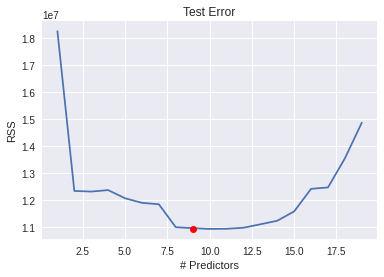

In [27]:
plt.plot(models_train['RSS'])
plt.xlabel('# Predictors')
plt.ylabel('RSS')
plt.title('Test Error')
plt.plot(models_train['RSS'].argmin(), models_train['RSS'].min(), 'or');

In [23]:
models_full = pd.DataFrame(columns=['RSS', 'model'])

predictors = []

for i in range(1,20):    
    models_full.loc[i] = forward(predictors, X, y, X, y)
    predictors = models_full.loc[i]['model'].model.exog_names

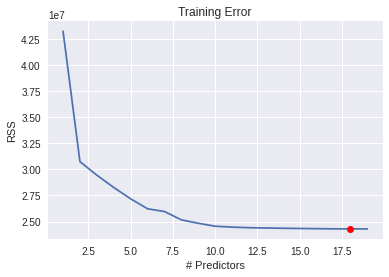

In [26]:
plt.plot(models_full['RSS'])
plt.xlabel('# Predictors')
plt.ylabel('RSS')
plt.title('Training Error')
plt.plot(models_full['RSS'].argmin(), models_full['RSS'].min(), 'or');

In [24]:
print(sorted(models_train.loc[10, 'model'].model.exog_names))
print(sorted(models_full.loc[10, 'model'].model.exog_names))

['Assists', 'AtBat', 'CRBI', 'CRuns', 'CWalks', 'Division', 'Hits', 'League', 'PutOuts', 'Runs']
['Assists', 'AtBat', 'CAtBat', 'CRBI', 'CRuns', 'CWalks', 'Division', 'Hits', 'PutOuts', 'Walks']


# 6.6 Lab 2 : Ridge Regression and Lasso